# Практика

## Задание 1. К ближайщих соседей.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = datasets.make_classification(n_samples = 100, n_features = 2,
                                    n_informative = 2, n_redundant= 0, n_classes = 3, n_clusters_per_class = 1)

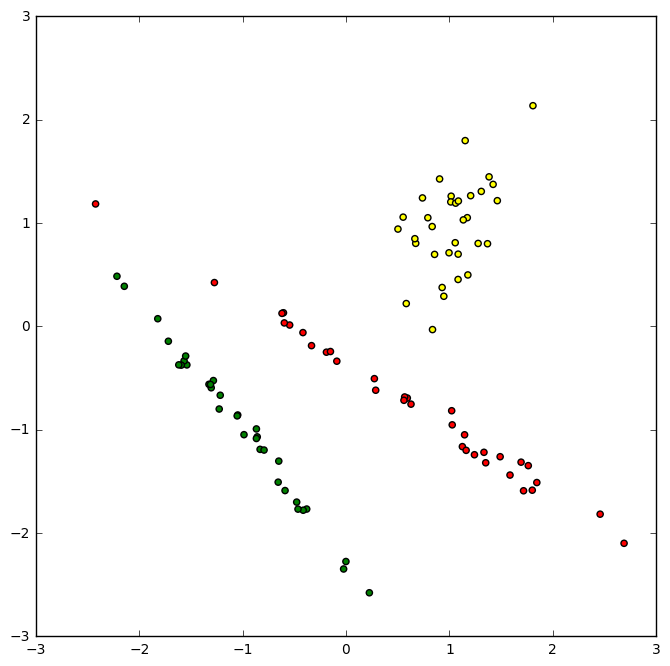

In [31]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightgreen'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

In [32]:
from sklearn import cross_validation

In [33]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data[0], 
                                                                                     data[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
pred = classifier.predict(test_data)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

accuracy_score(pred, test_labels)

0.96666666666666667

In [41]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

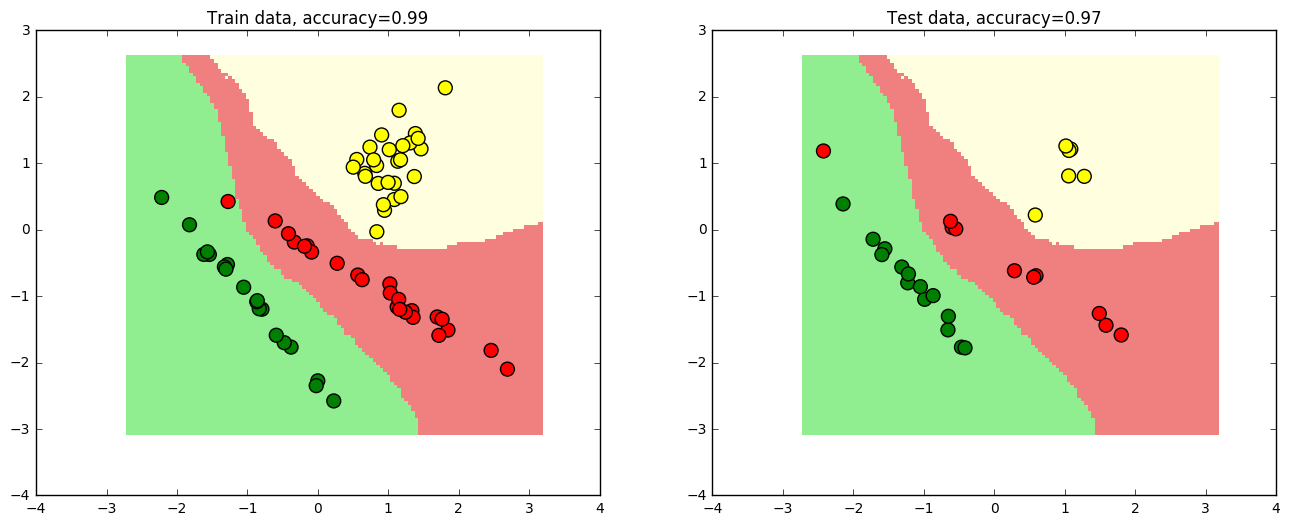

In [42]:
plot_decision_surface(classifier, train_data, train_labels, test_data, test_labels)

In [46]:
from sklearn.cross_validation import cross_val_score

In [62]:
def getAccuracy(K):
    estimator = KNeighborsClassifier(n_neighbors = K)
    cvs = cross_val_score(estimator, data[0], data[1])
    return cvs[1]

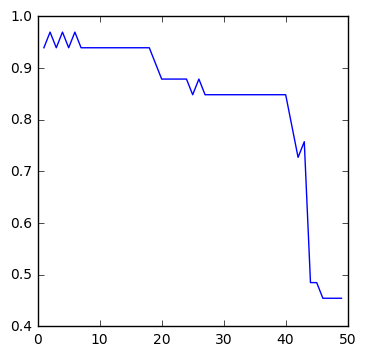

In [65]:
x = np.arange(1, 50)
pyplot.figure(figsize(4, 4))
pyplot.plot(x, map(getAccuracy, x))
pyplot.show()

# Задание 2. Байесовский классификатор.

In [66]:
digit = datasets.load_digits()
breat_can = datasets.load_breast_cancer()

In [85]:
digit.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [67]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
bern = BernoulliNB()
gaus = GaussianNB()
mult = MultinomialNB()

## Бернули

In [90]:
cross_val_score(estimator = bern,X = digit.data,y = digit.target).mean()

0.82582365077805819

In [91]:
cross_val_score(estimator=bern,X = breat_can.data,y = breat_can.target).mean()

0.62742040285899936

## Гауссиан

In [92]:
cross_val_score(estimator = gaus,X = digit.data,y = digit.target).mean()

0.81860038035501381

In [93]:
cross_val_score(estimator = gaus,X = breat_can.data,y = breat_can.target).mean()

0.9367492806089297

## Мультиномиальный

In [94]:
cross_val_score(estimator = mult,X = digit.data,y = digit.target).mean()

0.87087714897350532

In [95]:
cross_val_score(estimator = mult,X = breat_can.data,y = breat_can.target).mean()

0.89457904019307521

## Ответы

На датасете breast_cancer лучший результат - Гаусовский наивный баес. 0.9367492806089297
На датасете digits лучший результат - Мультиномиальный наивный баес. 0.87087714897350532
Утверждение (d).

# Задача 3. Метрики в задаче регресии

In [96]:
x = np.arange(-5, 5, 10.0/500)
noise = np.random.normal(0,0.2, 500)

In [97]:
y = 1.0 + 0.5 * x + noise

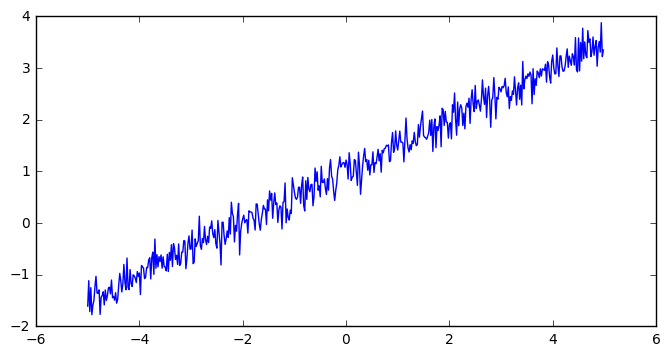

In [101]:
pyplot.figure(figsize(8,4))
pyplot.plot(x,y)

In [102]:
def func(lin):
    return metrics.mean_squared_error(lin[0] + lin[1]*x, y)

In [104]:
from scipy import optimize

In [105]:
res = optimize.minimize(func, [0, 0])
res

      fun: 0.042662713639447875
 hess_inv: array([[ 0.50435016, -0.00123676],
       [-0.00123676,  0.06077684]])
      jac: array([  1.88546255e-06,  -6.63660467e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 1.00453135,  0.49860156])

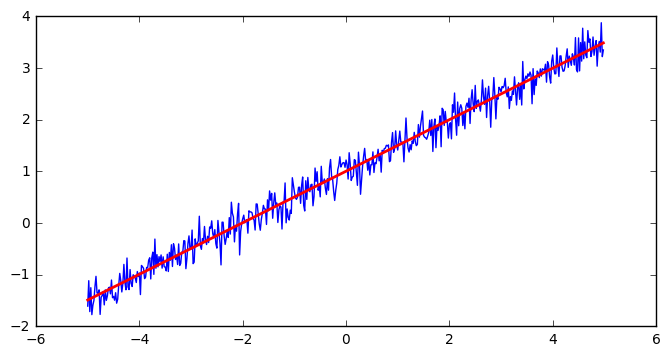

In [107]:
pyplot.plot(x,y)
pyplot.plot(x, res.x[0] + res.x[1]*x, linewidth=2, color = 'red')

In [108]:
noise_dis = np.random.normal(0,0.2, 75)
y_a = -1 + noise_dis
x_a = np.arange(-4.5, 4.5, 9.0/75.0)

In [112]:
x1 = np.hstack((x,x_a))
y1 = np.hstack((y,y_a))

In [114]:
def func_MSE(lin):
    return metrics.mean_squared_error(lin[0] + lin[1] *x1, y1)

def func_MAE(lin):
    return metrics.mean_absolute_error(lin[0] + lin[1] *x1, y1)

In [115]:
coef_1 = optimize.minimize(func_MSE, [0, 0])
coef_2 = optimize.minimize(func_MAE, [0, 0])

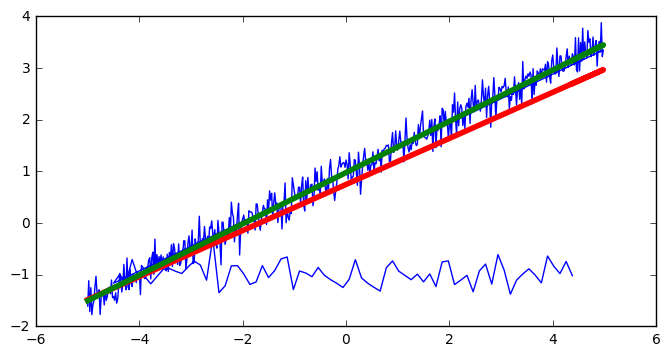

In [120]:
pyplot.plot(x1,y1)
pyplot.plot(x1, coef_1.x[0] + coef_1.x[1]*x1, linewidth=4, color = 'red')
pyplot.plot(x1, coef_2.x[0] + coef_2.x[1]*x1, linewidth=4, color = 'green')

Вывод: МAE устойчива к выбросам, MSE менее устойчив

## Задача 4. Решающие деревья

In [2]:
data = pd.read_csv("german.data", sep=' ')

In [3]:
data.head()

,Account_Status,Duration,CreditHistory,Purpose,CreditAmmount,SavingsAccount,PresentEmploymentSince,InstallimentRate,PersStatusAndSex,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumOfCredits,Job,NumberOfPeopleProvideMaint,Telephone,Foreign,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
x = data.drop('Target', axis = 1)
y = data['Target']

In [6]:
cat_data = ['Account_Status','CreditHistory', 'Purpose', 'SavingsAccount', 'PresentEmploymentSince',
            'PersStatusAndSex', 'OtherDebtors', 'Property', 'OtherPlans', 'Housing', 'Job', 'Telephone', 'Foreign']
x_real = x.drop(cat_data, axis = 1)
x_cat = x[cat_data]

In [7]:
from sklearn.feature_extraction import DictVectorizer
encoder = DictVectorizer(sparse = False)
x_cat_enc = encoder.fit_transform(x_cat.T.to_dict().values())

In [8]:
x_in = np.hstack([x_real, x_cat_enc])

In [9]:
DTree = DecisionTreeRegressor(max_depth=5)
DTree.fit(x_in, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
from sklearn.cross_validation import cross_val_score

In [11]:
def findTreeQual(k):
    return cross_val_score(DecisionTreeRegressor(max_depth = k), x_in, y).mean()

In [12]:
X = np.arange(1,60)
Y = map(lambda i:findTreeQual(i), X)

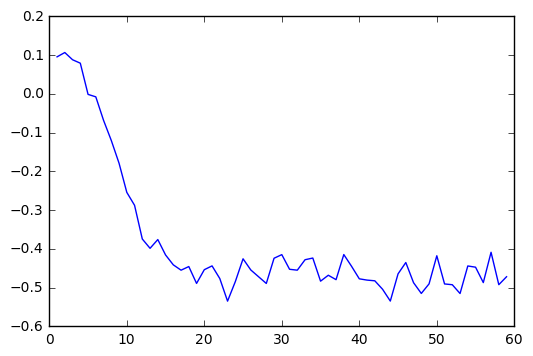

In [13]:
pyplot.plot(X, Y)

In [14]:
from sklearn import tree

In [26]:
tree.export_graphviz(DTree, out_file="DTree")

In [29]:
from graphviz import Digraph
import graphviz

In [31]:
graphviz.render('dot','pdf','DTree')

'DTree.pdf'

Пожалуйста, посмотрите файл  в root'е. Я так и не разобрался, как импортировать .dot в обьекты graphviz.Graph.